In [1577]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [1578]:
data = pd.read_csv('fifa21_train.csv')
pd.set_option('display.max_columns', None)
data.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [1579]:
cols = []
for column in data.columns:
    cols.append(column.lower().replace(" ", '_'))
data.columns = cols
data.head(1)

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [1580]:
data['height'] = data['height'].str.replace("'", ".")
data['height'] = data['height'].str.replace('"', " ")
data['height'] = pd.to_numeric(data['height'])
data.head(1)

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.9,161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [1581]:
data['height'].dtypes

dtype('float64')

In [1582]:
data['team_&_contract'] = data['team_&_contract'].str.replace('~', '-')
data['contract'] = data['contract'].str.replace('~', '-')
data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 - 2020,5.90,161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 - 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 - 2022,5.40,134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 - 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 - 2021,5.10,152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 - 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 - 2021,5.11,150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 - 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 - 2021,6.10,168lbs,Left,5,"Feb 8, 2018",NaN,€625K,€3K,€891K,2018 - 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3 ★,2★,Medium,Medium,1 ★,75,28,56

In [1583]:
sum(data.duplicated())

0

In [1584]:
data.isna().sum()
round(data.isna()/len(data),4)*100
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),2)*100)

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
header_name,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
percent_nulls,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1585]:
data = data.drop(['id','loan_date_end', 'lcm','cm','rcm'], axis = 1)
data.head()

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 - 2020,5.90,161lbs,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 - 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159lbs,Right,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 - 2022,5.40,134lbs,Right,0,"Jan 31, 2019",€9M,€49K,€15.3M,2019 - 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 - 2021,5.10,152lbs,Right,13,"Jul 1, 2016",€275K,€4K,€694K,2016 - 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 - 2021,5.11,150lbs,Right,8,"Jul 1, 2018",€725K,€2K,€1.4M,2018 - 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [1586]:
data['weight'] = data['weight'].str.replace('lbs', '').astype(int)
data['w/f'] = data['w/f'].str.replace('★', '').astype(int)
data['sm'] = data['sm'].str.replace('★', '').astype(int)
data['ir'] = data['ir'].str.replace('★', '').astype(int)
data.head(1)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 - 2020,5.9,161,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 - 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [1587]:
data['value'] = data['value'].str.replace('€', '')
data['wage'] = data['wage'].str.replace('€', '')
data['release_clause'] = data['release_clause'].str.replace('€', '')
data.head(1)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 - 2020,5.9,161,Right,1,"Jul 1, 2015",525K,4K,801K,2015 - 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [1588]:
def money(x):
    if 'K' in str(x):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    elif 'M' in str(x):
        x = str(x).replace('M', '')
        x =float(x) * 1000000
    return float(x)

In [1589]:
for i in data.columns[12:15]:
    data[i] = data[i].apply(money)
data.head(1)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 - 2020,5.9,161,Right,1,"Jul 1, 2015",525000.0,4000.0,801000.0,2015 - 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [1590]:
data = data.dropna()
data = data.reset_index(drop=True)
data.shape

(11211, 96)

In [1591]:
def plus(ctr):
    temp = '0'
    Sum = 0
    for k in ctr:
        if (k.isdigit()):
            temp += k
        else:
            Sum += int(temp)
            temp = '0'
    return Sum + int(temp)

In [1592]:
for i in data.columns[-24:-1]:
    data[i] = data[i].apply(plus)
data.head()

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 - 2020,5.90,161,Right,1,"Jul 1, 2015",525000.0,4000.0,801000.0,2015 - 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,59,59,61,62,62,62,61,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159,Right,0,"Jan 16, 2015",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77+0,77,77,77,77,77,77,77,77,77,77,77,77,59,55,55,55,59,55,50,50,50,55,20,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 - 2022,5.40,134,Right,0,"Jan 31, 2019",9000000.0,49000.0,15300000.0,2019 - 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73+2,75,75,80,79,79,79,80,80,80,80,80,80,61,58,58,58,61,55,43,43,43,55,14,80
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 - 2021,5.10,152,Right,13,"Jul 1, 2016",275000.0,4000.0,694000.0,2016 - 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,50+2,52,52,51,51,51,51,51,55,55,55,55,55,58,60,60,60,58,59,60,60,60,59,16,59
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 - 2021,5.11,150,Right,8,"Jul 1, 2018",725000.0,2000.0,1400000.0,2018 - 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,56+2,58,58,59,59,59,59,59,63,63,63,64,64,66,66,66,66,66,65,63,63,63,65,17,65


In [1593]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11211.0,2.499973e+01,4.765088e+00,16.0,21.00,24.0,28.0,43.0
height,11211.0,5.801062e+00,4.491481e-01,5.1,5.11,5.9,6.1,6.9
weight,11211.0,1.654296e+02,1.577479e+01,117.0,154.00,165.0,176.0,243.0
growth,11211.0,5.696637e+00,5.829080e+00,0.0,0.00,4.0,10.0,26.0
value,11211.0,2.617506e+06,5.359234e+06,0.0,375000.00,825000.0,2600000.0,90000000.0
...,...,...,...,...,...,...,...,...
cb,11211.0,5.492936e+01,1.442457e+01,18.0,44.50,57.0,66.0,89.0
rcb,11211.0,5.492936e+01,1.442457e+01,18.0,44.50,57.0,66.0,89.0
rb,11211.0,5.625332e+01,1.351959e+01,15.0,49.00,59.0,66.0,86.0
gk,11211.0,2.266194e+01,1.442341e+01,11.0,17.00,18.0,20.0,91.0


In [1594]:
numerical = data.select_dtypes(include='number')
categorical= data.select_dtypes(include=object)
numerical = numerical[['age','growth','value','wage','release_clause','reactions','power','shot_power','vision','composure','total_stats','base_stats','pas','dri','phy','ova']]
numerical

,age,growth,value,wage,release_clause,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,ova
0,26,1,525000.0,4000.0,801000.0,66,306,62,68.0,54.0,1682,357,63,63,60,64
1,30,0,8500000.0,23000.0,0.0,75,372,74,72.0,70.0,1961,412,68,82,71,77
2,33,0,9000000.0,49000.0,15300000.0,78,308,79,78.0,82.0,1925,404,78,86,56,80
3,22,13,275000.0,4000.0,694000.0,55,277,57,54.0,48.0,1527,329,54,57,60,59
4,23,8,725000.0,2000.0,1400000.0,62,280,61,64.0,58.0,1664,360,60,64,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11206,29,0,550000.0,500.0,1200000.0,71,303,64,37.0,60.0,1638,337,47,66,57,65
11207,25,5,625000.0,3000.0,891000.0,53,273,31,54.0,46.0,1589,347,56,59,69,65
11208,27,4,1600000.0,4000.0,2900000.0,65,217,50,15.0,56.0,1123,387,66,72,70,70
11209,22,8,1100000.0,2000.0,1700000.0,62,278,61,58.0,58.0,1603,337,60,72,43,67


In [1595]:
numerical

,age,growth,value,wage,release_clause,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,ova
0,26,1,525000.0,4000.0,801000.0,66,306,62,68.0,54.0,1682,357,63,63,60,64
1,30,0,8500000.0,23000.0,0.0,75,372,74,72.0,70.0,1961,412,68,82,71,77
2,33,0,9000000.0,49000.0,15300000.0,78,308,79,78.0,82.0,1925,404,78,86,56,80
3,22,13,275000.0,4000.0,694000.0,55,277,57,54.0,48.0,1527,329,54,57,60,59
4,23,8,725000.0,2000.0,1400000.0,62,280,61,64.0,58.0,1664,360,60,64,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11206,29,0,550000.0,500.0,1200000.0,71,303,64,37.0,60.0,1638,337,47,66,57,65
11207,25,5,625000.0,3000.0,891000.0,53,273,31,54.0,46.0,1589,347,56,59,69,65
11208,27,4,1600000.0,4000.0,2900000.0,65,217,50,15.0,56.0,1123,387,66,72,70,70
11209,22,8,1100000.0,2000.0,1700000.0,62,278,61,58.0,58.0,1603,337,60,72,43,67


In [1596]:
keep = (((numerical.corrwith(numerical['ova']))**2)**.5)

In [1597]:
corrs_drop = []
threshold = 0.5
for i in range(keep.shape[0]):
    if keep[i]< threshold:
        keep[i] = np.nan
        corrs_drop=keep.index[i]
        
keep = keep.dropna()
numerical = numerical.drop(corrs_drop, axis = 1)
numerical.head()

,age,growth,value,wage,release_clause,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,ova
0,26,1,525000.0,4000.0,801000.0,66,306,62,68.0,54.0,1682,357,63,63,60,64
1,30,0,8500000.0,23000.0,0.0,75,372,74,72.0,70.0,1961,412,68,82,71,77
2,33,0,9000000.0,49000.0,15300000.0,78,308,79,78.0,82.0,1925,404,78,86,56,80
3,22,13,275000.0,4000.0,694000.0,55,277,57,54.0,48.0,1527,329,54,57,60,59
4,23,8,725000.0,2000.0,1400000.0,62,280,61,64.0,58.0,1664,360,60,64,66,65


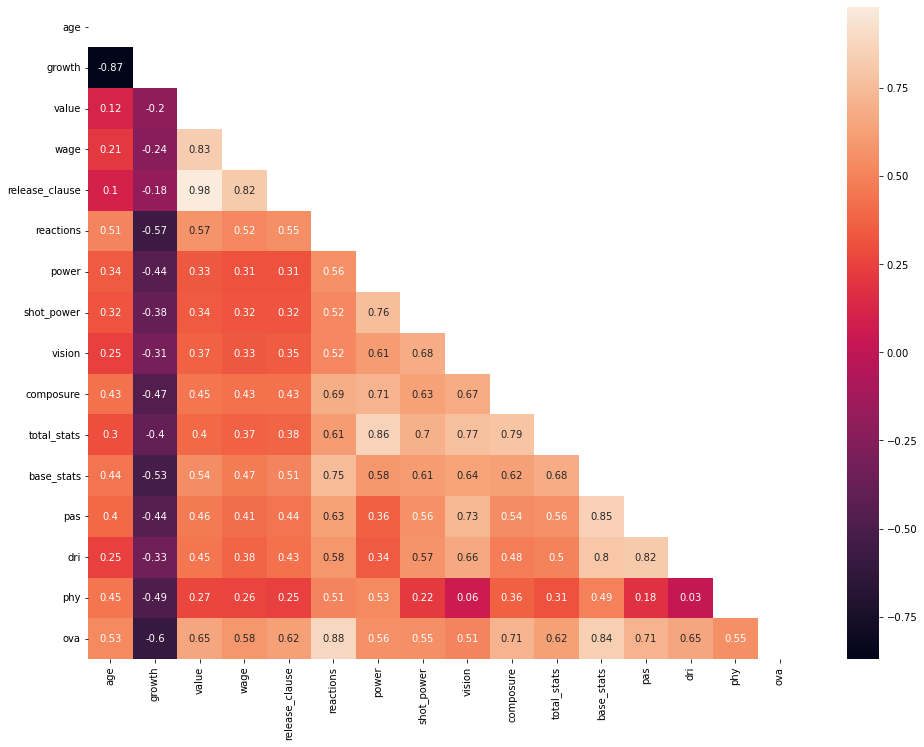

In [1598]:
corr = np.corrcoef(numerical.corr().round(2))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style():
    f,ax = plt.subplots(figsize =(16, 12))
    sns.heatmap(numerical.corr().round(2), mask=mask, annot=True)

In [1614]:
numerical_clean = numerical.drop(columns = ['growth', 'wage','release_clause'])
numerical_clean.head()

,age,value,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,ova
0,26,525000.0,66,306,62,68.0,54.0,1682,357,63,63,60,64
1,30,8500000.0,75,372,74,72.0,70.0,1961,412,68,82,71,77
2,33,9000000.0,78,308,79,78.0,82.0,1925,404,78,86,56,80
3,22,275000.0,55,277,57,54.0,48.0,1527,329,54,57,60,59
4,23,725000.0,62,280,61,64.0,58.0,1664,360,60,64,66,65


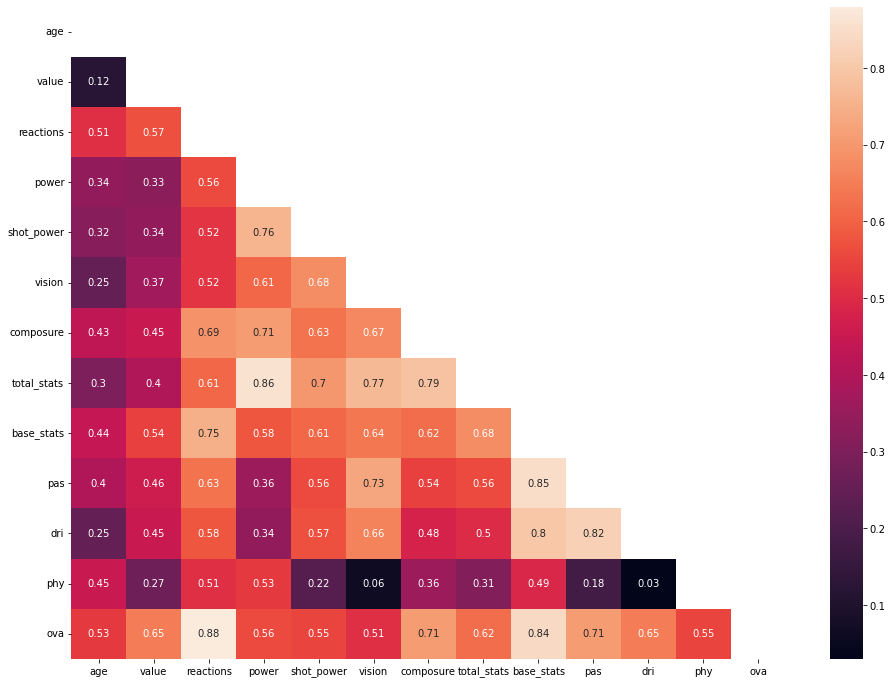

In [1615]:
corr = np.corrcoef(numerical_clean.corr().round(2))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style():
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(numerical_clean.corr().round(2), mask = mask, annot = True)

In [1599]:
from sklearn.preprocessing import MinMaxScaler

x= data.drop(['ova'], axis=1)
y = data['ova']

x_num = x.select_dtypes(include='number')
x_cat = x.select_dtypes(include=object)
x_num.head()

,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,26,5.90,161,1,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,59,59,61,62,62,62,61,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,30,6.00,159,0,8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,77,77,77,77,77,77,77,77,77,77,77,77,59,55,55,55,59,55,50,50,50,55,20
2,33,5.40,134,0,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,75,75,80,79,79,79,80,80,80,80,80,80,61,58,58,58,61,55,43,43,43,55,14
3,22,5.10,152,13,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,52,52,51,51,51,51,51,55,55,55,55,55,58,60,60,60,58,59,60,60,60,59,16
4,23,5.11,150,8,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,58,58,59,59,59,59,59,63,63,63,64,64,66,66,66,66,66,65,63,63,63,65,17


In [1600]:
x_cat.head()

,name,nationality,club,bp,position,team_&_contract,foot,joined,contract,a/w,d/w,hits,ls
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 - 2020,Right,"Jul 1, 2015",2015 - 2020,High,Medium,3,58+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",Right,"Jan 16, 2015","Dec 31, 2020 On Loan",High,Low,44,77+0
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 - 2022,Right,"Jan 31, 2019",2019 - 2022,High,Medium,73,73+2
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 - 2021,Right,"Jul 1, 2016",2016 - 2021,Medium,Medium,7,50+2
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 - 2021,Right,"Jul 1, 2018",2018 - 2021,Low,Medium,4,56+2


In [1601]:
x_num = x_num[['age','value','reactions','power','shot_power','vision','composure','total_stats', 'base_stats']]


In [1622]:
x_cat = x_cat[['bp','foot','a/w','d/w']]
x_cat.head()

,bp,foot,a/w,d/w
0,CM,Right,High,Medium
1,ST,Right,High,Low
2,CAM,Right,High,Medium
3,CDM,Right,Medium,Medium
4,CDM,Right,Low,Medium


In [1603]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             11211 non-null  object
 1   nationality      11211 non-null  object
 2   club             11211 non-null  object
 3   bp               11211 non-null  object
 4   position         11211 non-null  object
 5   team_&_contract  11211 non-null  object
 6   foot             11211 non-null  object
 7   joined           11211 non-null  object
 8   contract         11211 non-null  object
 9   a/w              11211 non-null  object
 10  d/w              11211 non-null  object
 11  hits             11211 non-null  object
 12  ls               11211 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


In [1623]:
transformer = MinMaxScaler().fit(x_num)
x_normalized = transformer.transform(x_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized,columns = x_num.columns)
x_normalized = pd.DataFrame(x_normalized)

(11211, 9)


In [1624]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [1625]:
encoder = OneHotEncoder().fit(x_cat)
encoded = encoder.transform(x_cat).toarray()
cols = [colname for row in encoder.categories_ for colname in row]
onehot_encoded = pd.DataFrame(encoded, columns = cols)
cols_to_drop = [row[0] for row in encoder.categories_]
onehot_encoded = onehot_encoded.drop(cols_to_drop, axis = 1)
print(onehot_encoded.shape)

(11211, 19)


In [1626]:
x = pd.concat([x_normalized, onehot_encoded], axis = 1)

In [1627]:
x.shape

(11211, 28)

In [1628]:
from sklearn.model_selection import train_test_split

In [1630]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1611]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8968, 95)
(2243, 95)
(8968,)
(2243,)


In [1631]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [1639]:
from sklearn.metrics import r2_score

predictions2 = lm.predict(x_test)

r2_test = r2_score(y_test, predictions2)
print('test R2:', r2_test)

test R2: 0.8979867582310916


In [1634]:
predictions = lm.predict(x_train)

r2_train = r2_score(y_train, predictions)
print('train R2:', r2_train)

train R2: 0.8980735543714434


In [1635]:
from sklearn.metrics import mean_squared_error as mse

test_mse = mse(lm.predict(x_test), y_test)
print('test MSE:', test_mse)

test MSE: 4.78420196710116


In [1636]:
from math import sqrt

test_rmse = sqrt(test_mse)
print('test_RMSE', test_rmse)

test_RMSE 2.1872818673186956


In [1638]:
from sklearn.metrics import mean_absolute_error as mae

test_mae = mae(lm.predict(x_test), y_test)
print('test MAE', test_mae)

test MAE 1.702520902773251
